In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
import random
import math
import scipy.stats

In [2]:
path = '/Users/gracewang/Dropbox/Harvard/facebook-fact-check.csv'
file = pd.read_csv(path)
file.head()

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


In [3]:
#Cleaning data and only keeping categories that are important to me or that I might use
delete = ['account_id','post_id','Post URL','Date Published','Debate','share_count']
for val in delete:
    del file[val]
file.head(10)

,Category,Page,Post Type,Rating,reaction_count,comment_count
0,mainstream,ABC News Politics,video,no factual content,146.0,15.0
1,mainstream,ABC News Politics,link,mostly true,33.0,34.0
2,mainstream,ABC News Politics,link,mostly true,63.0,27.0
3,mainstream,ABC News Politics,link,mostly true,170.0,86.0
4,mainstream,ABC News Politics,video,mostly true,3188.0,2815.0
5,mainstream,ABC News Politics,link,mostly true,28.0,21.0
6,mainstream,ABC News Politics,video,mostly true,409.0,105.0
7,mainstream,ABC News Politics,link,mostly true,62.0,64.0
8,mainstream,ABC News Politics,link,mostly true,39.0,6.0
9,mainstream,ABC News Politics,video,mostly true,278.0,59.0


In [4]:
#making a contingency table to better view the relationships bewteen the variables
contingency_table = pd.crosstab( file['Rating'],file['Category'],margins = True)
contingency_table

Category,left,mainstream,right,All
Rating,,,,
mixture of true and false,68,8,169,245
mostly false,22,0,82,104
mostly true,265,1085,319,1669
no factual content,116,52,96,264
All,471,1145,666,2282


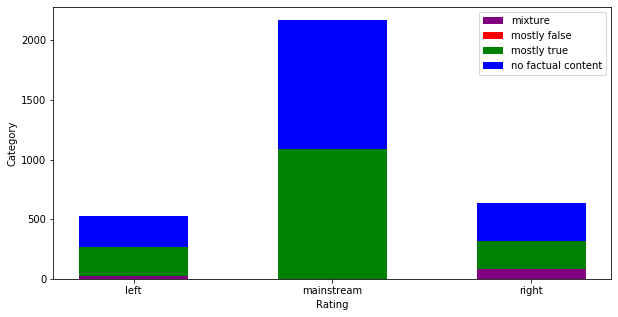

In [5]:
#Assigns the frequency values
mixcount = contingency_table.iloc[0][0:3].values
mfcount = contingency_table.iloc[1][0:3].values
mtcount = contingency_table.iloc[2][0:3].values
nofactscount = contingency_table.iloc[2][0:3].values

#Plots the segmented bar chart
fig = plt.figure(figsize=(10, 5))
categories = ["left","mainstream","right"]
p1 = plt.bar(categories, mixcount, 0.55, color = 'purple')
p2 = plt.bar(categories, mfcount, 0.55, bottom=mixcount, color = 'red')
p3 = plt.bar(categories, mtcount, 0.55, bottom=mfcount, color = 'green')
p4 = plt.bar(categories, nofactscount, 0.55, bottom=mtcount, color = 'blue')
plt.legend((p1[0], p2[0], p3[0],p4[0]), ('mixture', 'mostly false', 'mostly true', 'no factual content'))
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()

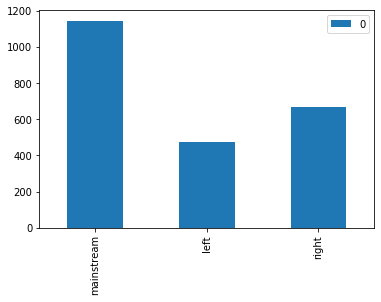

In [8]:
#making a bar chart to show distrubution of the "category" category
from collections import Counter
category = Counter(file.loc[:,'Category'])
df = pd.DataFrame.from_dict(category, orient='index')
df.plot(kind='bar')

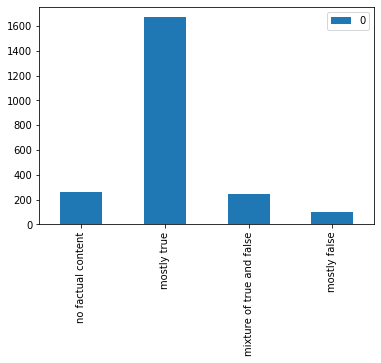

In [11]:
#making bar chart of the "rating" category
category = Counter(file.loc[:,'Rating'])
df = pd.DataFrame.from_dict(category, orient='index')
df.plot(kind='bar')

In [10]:
#Chi-squared test of independence
#finding chi-squared value and p value to determine if there is a relationship between political category and news relaibility
f_obs = np.array([contingency_table.iloc[0][0:3].values,
                  contingency_table.iloc[1][0:3].values,
                  contingency_table.iloc[2][0:3].values,
                  contingency_table.iloc[3][0:3].values])
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(658.9946366094824, 4.349533884444852e-139, 6)